In [39]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy.stats import pearsonr



In [16]:
df = pd.read_csv("QVI_data.csv")

print(df)

        LYLTY_CARD_NBR        DATE  STORE_NBR  TXN_ID  PROD_NBR  \
0                 1000  2018-10-17          1       1         5   
1                 1002  2018-09-16          1       2        58   
2                 1003  2019-03-07          1       3        52   
3                 1003  2019-03-08          1       4       106   
4                 1004  2018-11-02          1       5        96   
...                ...         ...        ...     ...       ...   
264829         2370701  2018-12-08         88  240378        24   
264830         2370751  2018-10-01         88  240394        60   
264831         2370961  2018-10-24         88  240480        70   
264832         2370961  2018-10-27         88  240481        65   
264833         2373711  2018-12-14         88  241815        16   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1          Red Rock Deli Chikn&Garlic Aioli 150g 

In [33]:
df['MONTH'] =  pd.to_datetime(df['DATE'],format='%Y-%m-%d').dt.to_period('M')
df['MONTH']
aggregated = df.groupby(['STORE_NBR', 'MONTH']).agg({
    'TOT_SALES': 'sum',
    'LYLTY_CARD_NBR': pd.Series.nunique,
    'TXN_ID': 'count',
    'PROD_QTY': ['mean', 'sum']
})

aggregated['PRICE_PER_UNIT'] = aggregated[('TOT_SALES', 'sum')] / aggregated[('PROD_QTY', 'sum')]

store_counts = df.groupby('STORE_NBR')['MONTH'].nunique()
stores_with_12_months = store_counts[store_counts == 12].index
aggregated = aggregated[aggregated.index.get_level_values('STORE_NBR').isin(stores_with_12_months)]

preTrialMeasures = aggregated[aggregated.index.get_level_values('MONTH') < '2019-02']
preTrialMeasures

TOT_SALES LYLTY_CARD_NBR TXN_ID  PROD_QTY     PRICE_PER_UNIT
                        sum        nunique  count      mean sum               
STORE_NBR MONTH                                                               
1         2018-07     206.9             49     52  1.192308  62       3.337097
          2018-08     176.1             42     43  1.255814  54       3.261111
          2018-09     278.8             59     62  1.209677  75       3.717333
          2018-10     188.1             44     45  1.288889  58       3.243103
          2018-11     192.6             46     47  1.212766  57       3.378947
...                     ...            ...    ...       ...  ..            ...
272       2018-09     304.7             32     36  1.972222  71       4.291549
          2018-10     430.6             44     51  1.941176  99       4.349495
          2018-11     376.2             41     45  1.933333  87       4.324138
          2018-12     403.9             47     47  1.893617  89       4.538202
          2019-01     423.0             46     50  1.920000  96       4.406250

[1820 rows x 6 columns]

In [ ]:
def calculate_correlation(df, metric, store_comparison):
    store_numbers = aggregated.index.get_level_values('STORE_NBR').unique()
    correlation_table = pd.DataFrame(columns=["Store1", "Store2", "corr_measure"])
    sample_c = df[df.index.get_level_values('STORE_NBR') == store_comparison][metric]
    for i in store_numbers:
        sample_i = df[df.index.get_level_values('STORE_NBR') == i][metric]
        corr = pearsonr(sample_c, sample_i)[0]
        correlation_table = pd.concat([correlation_table, pd.DataFrame([[store_comparison, i, corr]], columns=["Store1", "Store2", "corr_measure"])], ignore_index=True)
    correlation_table.sort_values(by=['corr_measure'], ascending=False)
    return correlation_table

corr_sales = calculate_correlation(preTrialMeasures, ('TOT_SALES', 'sum'), 77)
corr_num_custs = calculate_correlation(preTrialMeasures, ('LYLTY_CARD_NBR', 'nunique'), 77)

print(corr_sales)
print(corr_num_custs)


STORE_NBR  MONTH  
77         2018-07    296.8
           2018-08    255.5
           2018-09    225.2
           2018-10    204.5
           2018-11    245.3
           2018-12    267.3
           2019-01    204.4
Name: (TOT_SALES, sum), dtype: float64
STORE_NBR  MONTH  
77         2018-07    51
           2018-08    47
           2018-09    42
           2018-10    37
           2018-11    41
           2018-12    46
           2019-01    35
Name: (LYLTY_CARD_NBR, nunique), dtype: int64


/var/folders/rq/9wbc2l4d50z5b952bfndzkd40000gn/T/ipykernel_64496/422113640.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  correlation_table = pd.concat([correlation_table, pd.DataFrame([[store_comparison, i, corr]], columns=["Store1", "Store2", "corr_measure"])], ignore_index=True)
/var/folders/rq/9wbc2l4d50z5b952bfndzkd40000gn/T/ipykernel_64496/422113640.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  correlation_table = pd.concat([correlation_table, pd.DataFrame([[store_comparison, i,

    Store1 Store2  corr_measure
72      77     77      1.000000
67      77     71      0.914106
221     77    233      0.903774
111     77    119      0.867664
15      77     17      0.842668
..     ...    ...           ...
150     77    158     -0.709319
22      77     24     -0.718112
232     77    244     -0.774513
71      77     75     -0.806751
178     77    186     -0.820214

[260 rows x 3 columns]
    Store1 Store2  corr_measure
72      77     77      1.000000
221     77    233      0.990358
111     77    119      0.983267
241     77    254      0.916208
106     77    113      0.901348
..     ...    ...           ...
95      77    102     -0.652527
139     77    147     -0.656933
161     77    169     -0.666391
50      77     54     -0.760605
8       77      9     -0.785699

[260 rows x 3 columns]


In [79]:
def calculate_magnitude(df, metric, store_comparison):
    store_numbers = aggregated.index.get_level_values('STORE_NBR').unique()
    dist_table = pd.DataFrame(columns=["Store1", "Store2", "dist_measure"])
    sample_c = df[df.index.get_level_values('STORE_NBR') == store_comparison][metric].reset_index(drop=True)
    for i in store_numbers:
        sample_i = df[df.index.get_level_values('STORE_NBR') == i][metric].reset_index(drop=True)
        dist = np.linalg.norm(sample_i - sample_c)
        dist_table = pd.concat([dist_table, pd.DataFrame([[store_comparison, i, dist]], columns=["Store1", "Store2", "dist_measure"])], ignore_index=True)

    min_dist = dist_table['dist_measure'].min()
    max_dist = dist_table['dist_measure'].max()
    dist_table['mag_measure'] = 1 - (dist_table['dist_measure'] - min_dist) / (max_dist - min_dist)
    dist_table = dist_table.sort_values(by=['mag_measure'], ascending=False)
    return dist_table


dist_sales = calculate_magnitude(preTrialMeasures, ('TOT_SALES', 'sum'), 77)
dist_num_custs = calculate_magnitude(preTrialMeasures, ('LYLTY_CARD_NBR', 'nunique'), 77)

print(dist_sales)
print(dist_num_custs)


/var/folders/rq/9wbc2l4d50z5b952bfndzkd40000gn/T/ipykernel_64496/2030198824.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dist_table = pd.concat([dist_table, pd.DataFrame([[store_comparison, i, dist]], columns=["Store1", "Store2", "dist_measure"])], ignore_index=True)
/var/folders/rq/9wbc2l4d50z5b952bfndzkd40000gn/T/ipykernel_64496/2030198824.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dist_table = pd.concat([dist_table, pd.DataFrame([[store_comparison, i, dist]], columns=["Store1"

    Store1 Store2  dist_measure  mag_measure
72      77     77      0.000000     1.000000
221     77    233     57.809342     0.982207
49      77     53     98.777275     0.969597
46      77     50    100.672340     0.969014
42      77     46    101.582085     0.968734
..     ...    ...           ...          ...
157     77    165   2857.488660     0.120480
54      77     58   2869.987250     0.116633
225     77    237   2903.293984     0.106381
82      77     88   2908.804057     0.104685
214     77    226   3248.918500     0.000000

[260 rows x 4 columns]
    Store1 Store2  dist_measure  mag_measure
72      77     77      0.000000     1.000000
221     77    233      2.645751     0.989325
38      77     41      7.681146     0.969008
104     77    111     10.535654     0.957490
15      77     17     10.723805     0.956731
..     ...    ...           ...          ...
157     77    165    214.436471     0.134781
54      77     58    219.697519     0.113553
82      77     88    219.783985

In [89]:
score_sales = pd.merge(corr_sales, dist_sales, on=['Store1', 'Store2'])
score_sales['sales_score'] = 0.5 * score_sales['corr_measure'] + 0.5 * score_sales['mag_measure']
score_sales = score_sales.sort_values(by=['sales_score'], ascending=False)
score_sales

score_num_custs = pd.merge(corr_num_custs, dist_num_custs, on=['Store1', 'Store2'])
score_num_custs['num_custs_score'] = 0.5 * score_num_custs['corr_measure'] + 0.5 * score_num_custs['mag_measure']
score_num_custs = score_num_custs.sort_values(by=['num_custs_score'], ascending=False)
score_num_custs

scores_control = score_num_custs = pd.merge(score_sales, score_num_custs, on=['Store1', 'Store2'])
scores_control['final_control_score'] = 0.5 * score_num_custs['num_custs_score'] + 0.5 * score_num_custs['sales_score']
scores_control = score_num_custs.sort_values(by=['final_control_score'], ascending=False)

print(scores_control)



    Store1 Store2  corr_measure_x  dist_measure_x  mag_measure_x  sales_score  \
0       77     77        1.000000        0.000000       1.000000     1.000000   
1       77    233        0.903774       57.809342       0.982207     0.942990   
2       77     41        0.783232      130.753432       0.959755     0.871493   
4       77     17        0.842668      419.490489       0.870883     0.856776   
11      77    254        0.577108      276.909263       0.914769     0.745939   
..     ...    ...             ...             ...            ...          ...   
258     77     55       -0.666782     1828.539841       0.437185    -0.114798   
253     77    138       -0.585174     1776.259609       0.453277    -0.065949   
255     77    247       -0.631050     1637.333466       0.496037    -0.067506   
251     77    102       -0.550834     1750.358832       0.461249    -0.044792   
259     77     75       -0.806751     2379.058639       0.267738    -0.269507   

     corr_measure_y  dist_m

<Axes: xlabel='MONTH'>

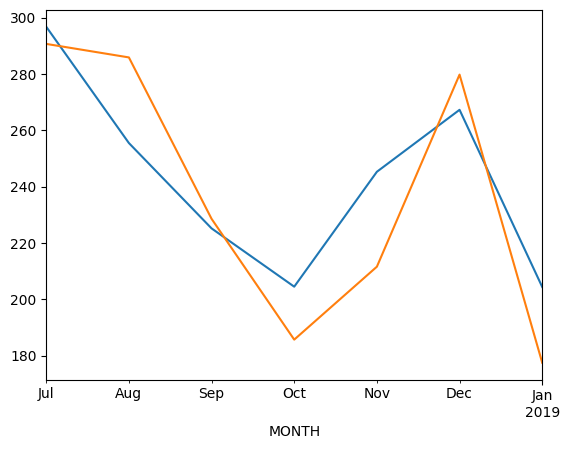

In [ ]:
control_store = 77
trial_store = 233
control_sales = preTrialMeasures[preTrialMeasures.index.get_level_values('STORE_NBR') == control_store][('TOT_SALES', 'sum')].droplevel('STORE_NBR')
trial_sales = preTrialMeasures[preTrialMeasures.index.get_level_values('STORE_NBR') == trial_store][('TOT_SALES', 'sum')].droplevel('STORE_NBR')
control_sales.plot()
trial_sales.plot()

0.9966555183946488


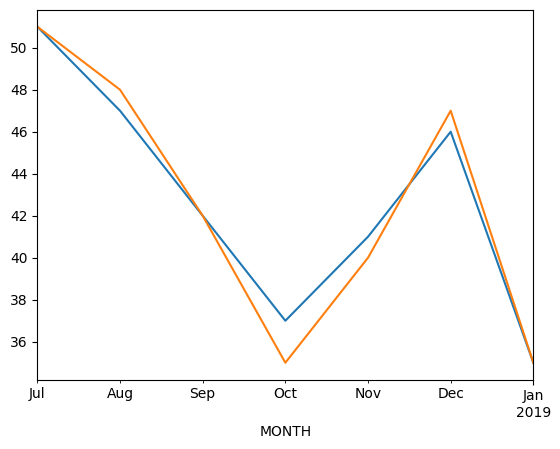

In [111]:
control_sales = preTrialMeasures[preTrialMeasures.index.get_level_values('STORE_NBR') == control_store][('LYLTY_CARD_NBR', 'nunique')].droplevel('STORE_NBR')
trial_sales = preTrialMeasures[preTrialMeasures.index.get_level_values('STORE_NBR') == trial_store][('LYLTY_CARD_NBR', 'nunique')].droplevel('STORE_NBR')
control_sales.plot()
trial_sales.plot()
scale_factor = trial_sales.sum() / control_sales.sum()
print(scale_factor)

In [112]:
trialMeasures = aggregated[(aggregated.index.get_level_values('MONTH') >= '2019-02') & (aggregated.index.get_level_values('MONTH') <= '2019-04')]
scaled_control_sales_trial = trialMeasures[trialMeasures.index.get_level_values('STORE_NBR') == control_store][('TOT_SALES', 'sum')].droplevel('STORE_NBR') * scale_factor
trial_sales_trial = trialMeasures[trialMeasures.index.get_level_values('STORE_NBR') == trial_store][('TOT_SALES', 'sum')].droplevel('STORE_NBR')
percentage_diff = 1 - trial_sales_trial / scaled_control_sales_trial
print(percentage_diff)

stdev = np.std(trial_sales / control_sales)
print(stdev)
print(trial_sales / control_sales)

t_values = percentage_diff / stdev

from scipy.stats import t

p_values = t.cdf(t_values, 7)
print(p_values)

MONTH
2019-02   -0.041782
2019-03    0.282700
2019-04    0.396083
Freq: M, Name: (TOT_SALES, sum), dtype: float64
0.024677045779897523
MONTH
2018-07    1.000000
2018-08    1.021277
2018-09    1.000000
2018-10    0.945946
2018-11    0.975610
2018-12    1.021739
2019-01    1.000000
Freq: M, Name: (LYLTY_CARD_NBR, nunique), dtype: float64
[0.0671288  0.99999566 0.99999956]
